# Integer linear programming experiments for vertex cover problems
// TODO Simple description of the project to add.

First of all, import the Python libraries used in the process of data analysis.

In [1]:
import pandas as pd
import numpy as np
import pyvis
import matplotlib.pyplot as plt
from matplotlib import cm
import params as pr
from mpl_toolkits import mplot3d

Import experimental data from the corresponding csv files. The data are splitted over multiple csv file, one for each graph class studied. The first three rows of one of these files are displayed below, to give an idea of the file structure.

In [2]:
gnp_data = pd.read_csv('data/gnp.csv')
bag_data = pd.read_csv('data/bag.csv')
rrg_data = pd.read_csv('data/rrg.csv')
wsg_data = pd.read_csv('data/wsg.csv')
gnp_data.head(3)

,name,n,p,seed,time,ticks,sol_nodes,gap,time_lim,edges,cnnct_cmp,avg_clust,std_dev_clust,radius,diameter
0,gnp_000,100,0.1,1,0.39,99.51,69.0,0.0,False,508,1,0.113342,0.053480,3,4
1,gnp_001,100,0.1,2,0.45,100.66,68.0,0.0,False,484,1,0.097705,0.047745,3,4
2,gnp_002,100,0.1,3,0.52,138.64,69.0,0.0,False,487,1,0.083568,0.043205,3,4


## Erdős–Rényi graphs
This chapter reports a detailed analysis of a particular subset of graphs named Erdős–Rényi graphs (also known as binomial graphs) generated using the `gnp_random_graph()` method of the Networkx package. With this method, the inclusion of each edge of the graph depends on a parametric probability *p*, indipendent from every other edge of the graph. 

First of all, plot the correlation between the solution time (y axis) versus the average clustering index of the graph (x axis). Graphs with different sizes are labeled with different colors. 

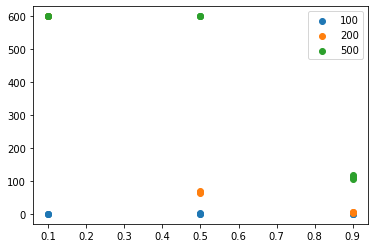

In [3]:
for i in range(len(pr.GNP_N)):
    filter = gnp_data['n']==pr.GNP_N[i]
    data = gnp_data[filter]
    plt.scatter(data['p'], data['time'], label=str(pr.GNP_N[i]))
plt.legend(loc="upper right")
plt.show()

Even studying how the size of the graph influences the computational difficulty of the associated LP problem might outline interesting trends related to this specific parameter.

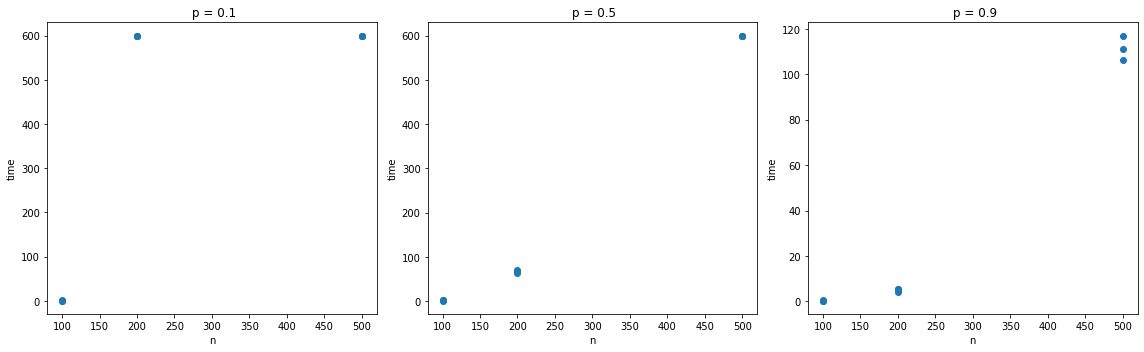

In [4]:
def size_impact_gnp(p, ax):
    filter = gnp_data['p'] == p
    data = gnp_data[filter]
    ax.scatter(data['n'], data['time'])
    ax.set_xlabel('n')
    ax.set_ylabel('time')
    ax.set_title(" p = " + str(p))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 5)
size_impact_gnp(0.1, ax1)
size_impact_gnp(0.5, ax2)
size_impact_gnp(0.9, ax3)
plt.tight_layout()
plt.show()

To summarize the different graphs given above, plot a 3-dimensional graph comprehensive of all the information and trends analyzed before. 

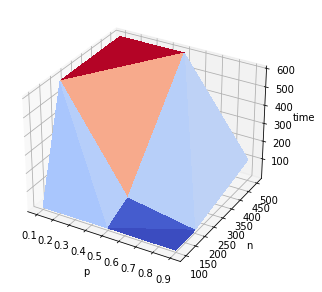

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
z = np.ravel(gnp_data['time'])
y = np.ravel(gnp_data['n'])
x = np.ravel(gnp_data['p'])

ax.set_xlabel('p')
ax.set_ylabel('n')
ax.set_zlabel('time')
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, antialiased=False)

plt.show()

Finally, plot the correlation between the probability to generate an edge of the graph *p* using the Erdős–Rényi model and the average clustering index of the generated graph. The average clustering index is a metric which measure how much each node of the graph is wired together with all the other nodes. Its maximum value is 1 (in case of a complete graph) and its lowest value is 0 (when there are no edges in the graph). As the graph suggest, a direct proportionality bond ties together the two parameters. It is also possible to give a mathematical proof of this correlation. 

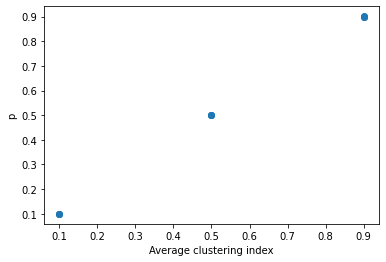

In [6]:
plt.scatter(data['p'], data['avg_clust'])
plt.xlabel("Average clustering index")
plt.ylabel("p")
plt.show()

### Hypothesis
The plots above outline an inverse exponential correlation between the probability to generate each edge of the graph *p* and the solution time of the MIP vertex cover instance. Therefore, the probability *p*, which has been proved to be directly proportional to the average clustering index of the graph, may represent a key factor in determing the complexity in the computing of the vertex cover set associated to the graph. Also the number of nodes of the graph plays an important role in determing the complexity of the problem, and even in this case the two measures are bounded by an exponential correlation. 

Deducing the right parameters *a* and *b* of the exponential formula 
<a href="https://www.codecogs.com/eqnedit.php?latex=y&space;=&space;ae^{-bx}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?y&space;=&space;ae^{-bx}" title="y = ae^{-bx}" /></a>

might be the next step of the experiments. However, current available data are surely not enough to perform such an elaborate job. In order to compensate this lack, the list of parameters used to generate the Erdős–Rényi graph should be expanded. In particular:
* likelihoods list should be expanded, including all the probability values between 0 and 1, sampled using 0.05 steps
* node number list might be expanded, including also 300 and 400 dimensions (or varying with a step of 50 nodes) 
* other 2 random seeds might be added

## Watts–Strogatz small-world graph
Watts-Strogatz graphs are generated using the Watts–Strogatz model (proposed by Duncan J. Watts and Steven Strogatz). This is a random graph generation model that produces graph with small-world properties (e.g. high clustering and short average path length). In this experiments, graph are generated using the `watts_strogatz_graph` method of the Networkx package. 

The graph generation is composed of three main stages. Firstly, the *n* nodes of the graph are wired together in a ring form. Then, each node is connected to its *k* nearest neighbors (*k-1* if *k* is not even), *k/2* on each side. Finally, rewire each node's *k/2* rightmost edges (with a probability *p*) with a random node of the graph (checks to avoid self-loops and duplicates in this stage).

First of all, check the correlation between the solution time (y axis) and the average clustering index, as already performed for the graphs generated using the Erdős–Rényi model.

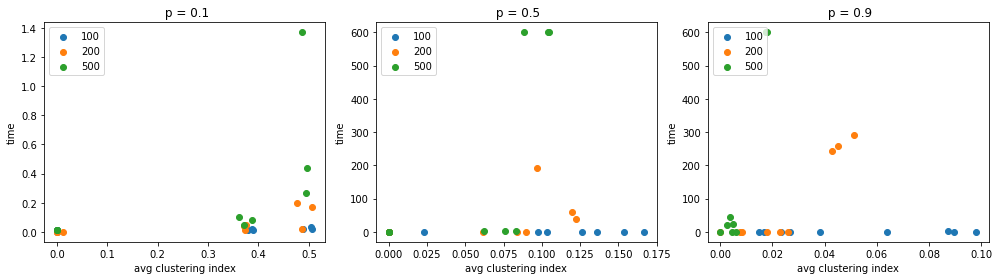

In [25]:
def correlation_wsg(p, ax):
    for i in range(len(pr.WS_N)):
        filter = np.logical_and(wsg_data['n'] == pr.WS_N[i], wsg_data['p'] == p)
        data = wsg_data[filter]
        ax.scatter(data['avg_clust'], data['time'], label=str(pr.WS_N[i]))
    ax.set_xlabel('avg clustering index')
    ax.set_ylabel('time')
    ax.legend(loc="upper left")
    ax.set_title(" p = " + str(p))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(14, 4)
correlation_wsg(0.1, ax1)
correlation_wsg(0.5, ax2)
correlation_wsg(0.9, ax3)
plt.tight_layout()
plt.show()

Moreover, analyzing the raw data it is possible to observe a correlation between the number of neighbors joined with each other *k*, the likelihood of an edge k to be rewired *p* and the time neeeded to find the minimum vertex cover of the graph. 

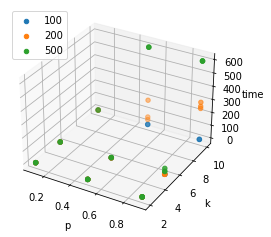

In [8]:
ax = plt.axes(projection='3d')
for i in range(len(pr.WS_N)):
    filter = wsg_data['n'] == pr.WS_N[i]
    data = wsg_data[filter]
    p = data['p']
    k = data['k']
    t = data['time']
    ax.scatter(p, k, t, label=pr.WS_N[i])
    
ax.set_xlabel('p')
ax.set_ylabel('k')
ax.set_zlabel('time')
ax.legend(loc="upper left")
plt.show()

Finally, plot the correlation between the average clustering index of the graph and the rewiring probabilities used to generate the graph and the number of neighbors of each node wired together in the first stage. 

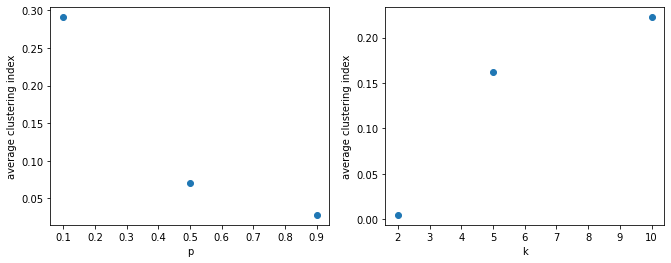

In [22]:
x1 = list(set(np.ravel(wsg_data['p'])))
x2 = list(set(np.ravel(wsg_data['k'])))
y1 = []
for i in x1:
    filter = wsg_data['p'] == i
    data = np.ravel(wsg_data[filter]['avg_clust'])
    y1.append(np.mean(data))
y2 = []
for i in x2:
    filter = wsg_data['k'] == i
    data = np.ravel(wsg_data[filter]['avg_clust'])
    y2.append(np.mean(data))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 4)
# probability
ax1.scatter(x1, y1)
ax1.set(xlabel="p", ylabel="average clustering index")
# number of neighbors
ax2.scatter(x2, y2)
ax2.set(xlabel="k", ylabel="average clustering index")
plt.show()

### Hypothesis
In this case, the combination of high rewiring probability and high number of nodes initially wired together seems to have the higher impact on the computation time needed by CPLEX in order to solve the problem. 

Even in this case, current available data are surely not enough to perform such an elaborate job. In order to compensate this lack, the list of parameters used to generate the Watts-Strogatz graph should be expanded. In particular:
* probabilities list should be expanded, including all the probability values between 0 and 1, sampled using 0.05 steps
* number of initial nodes wired together *k* might be expanded
* node number list might be expanded, including also 300 and 400 dimensions (optional)
* other 2 random seeds might be added

## Regular graphs
Regular graphs are a particular class of graphs where each vertex has the same number of neighbors. In graph theory, a regular graph where every vertex has degree *k* is also known as *k*-regular graph.

## Barabási–Albert graphs
Barabási–Albert graphs are a particular class of graphs generated using the Barabási–Albert model. This algorithm is based on a *preferential attachment* mechanism, which grows the graph by wiring new nodes with *m* edges to the existing nodes of the graph with high degree. Random graphs generated using this model are particularly similar to many scale-free networks that describe several natural and artificial systems in the real world (e.g. the Internet, citation networks and some social networks). The Barabási–Albert model have therefore the ability to generate networks with hubs (few nodes of the graph with impressively high degree compared to all the other nodes of the same graph). 



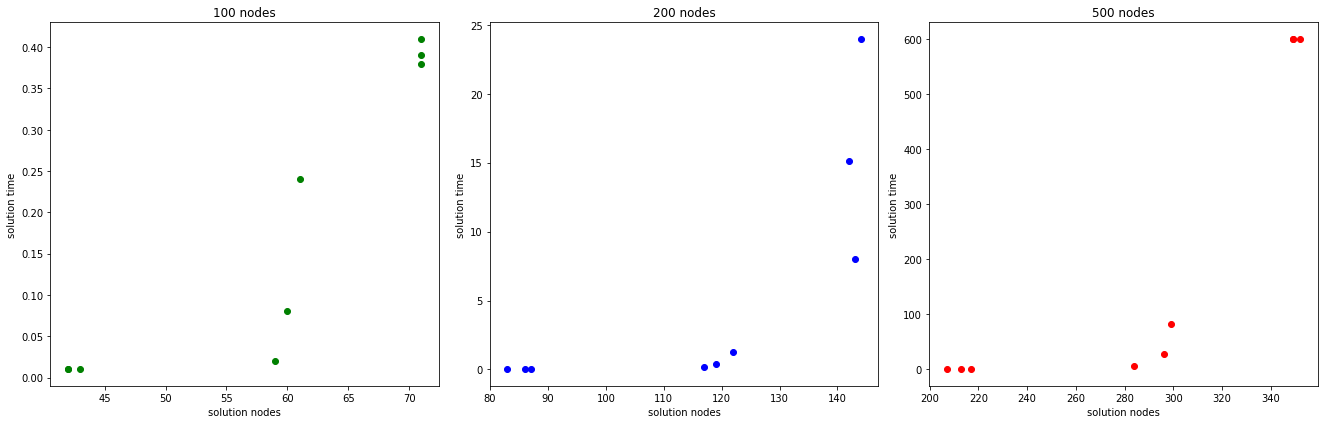

In [10]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18.5, 6)
colors = ['green', 'blue', 'red']

for i in range(len(pr.BA_N)):
    filter = bag_data['n']==pr.BA_N[i]
    data = bag_data[filter]
    ax[i].scatter(data['sol_nodes'], data['time'], color=colors[i])
    ax[i].set_xlabel('solution nodes')
    ax[i].set_ylabel('solution time')
    ax[i].set_title(str(pr.BA_N[i]) + " nodes")
plt.tight_layout()
plt.show()